# Infer model


In [1]:
%load_ext autoreload
%autoreload 2

### Import libraries

In [3]:
import sys  
sys.path.insert(1, '../')

In [5]:
import torch
from src.infer_model import load_model, infer_nn_model, create_stereo_pairs
from PIL import Image
from torchvision import transforms
import matplotlib.pyplot as plt

/home/jovyan/stereo-recreation-from-anaglyphs/image_colorization/infer/../src/infer_model.py:44: SyntaxWarning: invalid escape sequence '\ '
  output = """


### Set parameters

In [7]:
model_path = '../models/20250206_102039/unet_checkpoint_20250206_102039_epoch30.pth'
# anaglyph_path = '../../data/anaglyphs/-L__fvDaJcP9s8AH-Chd_anaglyph_5.jpg'
anaglyph_path = '../../../data/anaglyphs/-L__WnX7jiuGSZDXUc1p_anaglyph_7.jpg'
img_height = 256
img_width = img_height

### Load model and anaglyph image

In [8]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)
model = load_model(model_path, device)
anaglyph_image = Image.open(anaglyph_path).convert(mode='RGB')

cuda


### Infer model and generate inverse anaglyph image

In [9]:
generated_image = infer_nn_model(model, anaglyph_image, img_height, img_width, device)
reversed_anaglyph = transforms.ToPILImage(mode='RGB')(generated_image.squeeze(0).cpu())

stereo_pair = create_stereo_pairs(anaglyph_image, generated_image)

### Plot results

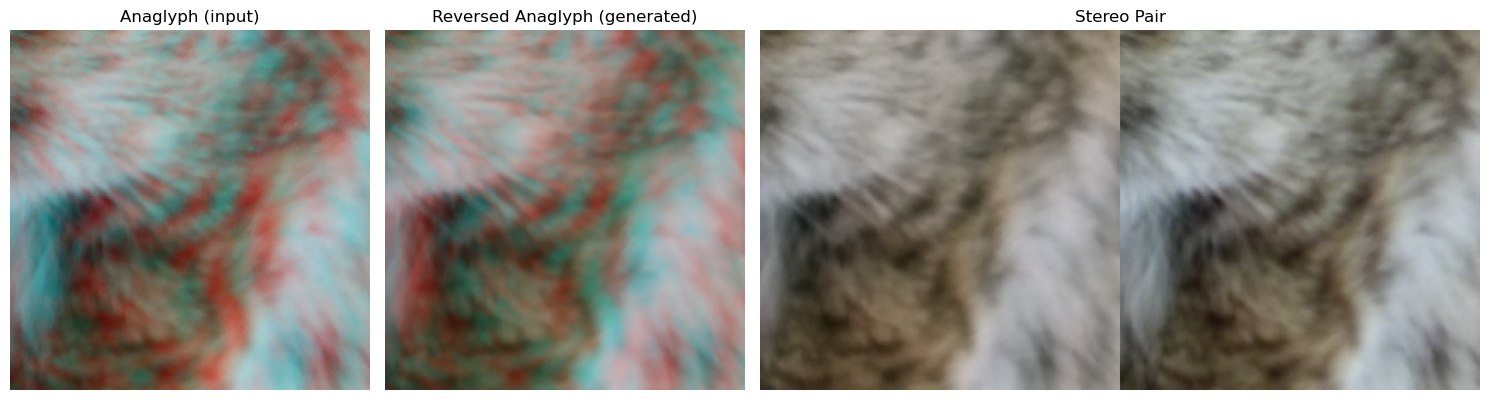

In [10]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5), gridspec_kw={'width_ratios': [1, 1, 2]})

# Display images in a single row
ax[0].imshow(anaglyph_image)
ax[0].set_title('Anaglyph (input)')
ax[0].axis('off')

ax[1].imshow(reversed_anaglyph)
ax[1].set_title('Reversed Anaglyph (generated)')
ax[1].axis('off')

ax[2].imshow(stereo_pair)
ax[2].set_title('Stereo Pair')
ax[2].axis('off')

plt.tight_layout()
plt.show()


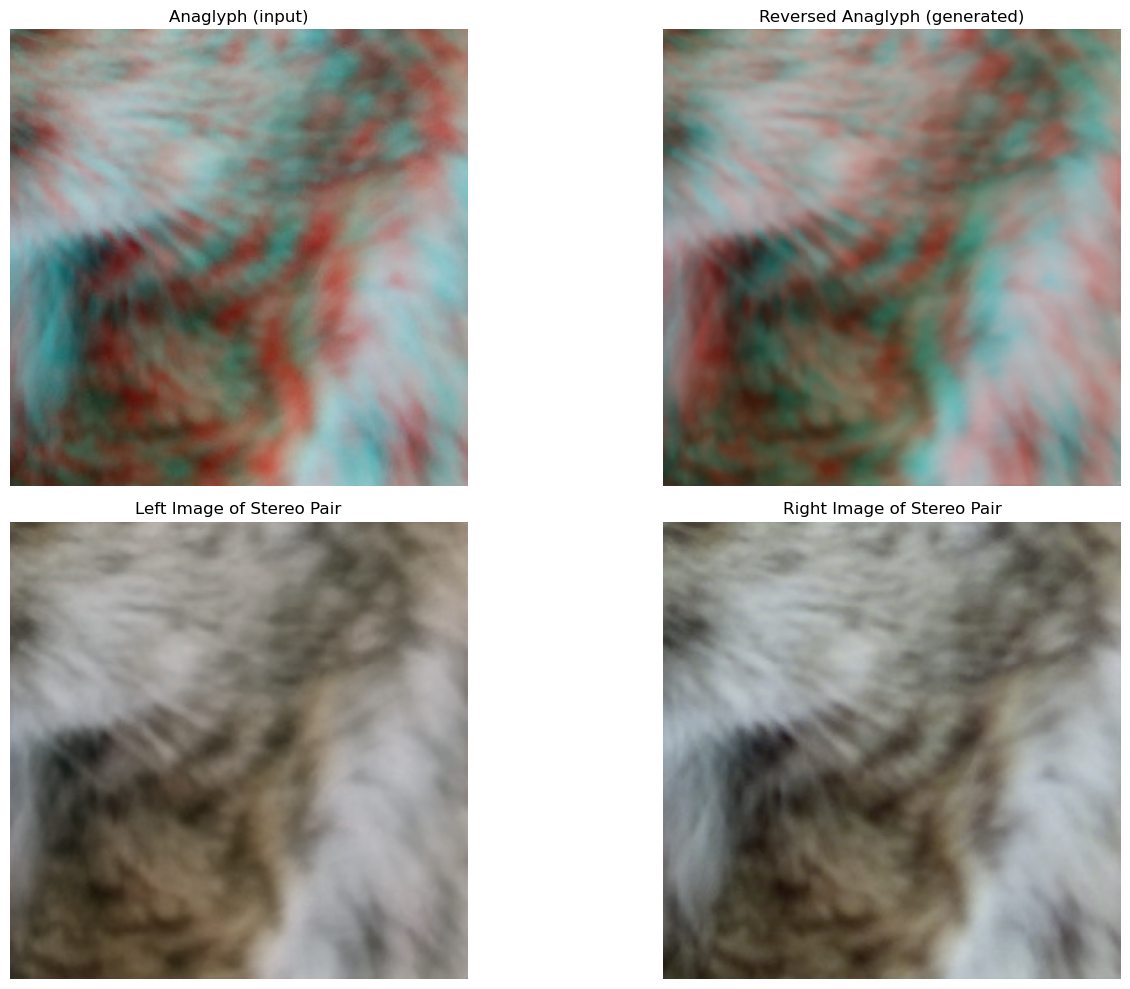

In [11]:
# Split the stereo pair into left and right images
width, height = stereo_pair.size
left_image = stereo_pair.crop((0, 0, width // 2, height))
right_image = stereo_pair.crop((width // 2, 0, width, height))

fig, ax = plt.subplots(2, 2, figsize=(15, 10))

# Display images in the first row
ax[0, 0].imshow(anaglyph_image)
ax[0, 0].set_title('Anaglyph (input)')
ax[0, 0].axis('off')

ax[0, 1].imshow(reversed_anaglyph)
ax[0, 1].set_title('Reversed Anaglyph (generated)')
ax[0, 1].axis('off')

# Display left and right images in the second row
ax[1, 0].imshow(left_image)
ax[1, 0].set_title('Left Image of Stereo Pair')
ax[1, 0].axis('off')

ax[1, 1].imshow(right_image)
ax[1, 1].set_title('Right Image of Stereo Pair')
ax[1, 1].axis('off')

plt.tight_layout()
plt.show()